In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from scipy.signal import find_peaks, convolve, medfilt
from scipy.optimize import curve_fit
import matplotlib as mpl
from glob import glob
from copy import copy

%matplotlib widget

In [3]:
freqs, dark_s21 = np.load('./S21s/VNAsweep.npy')
M_pxs = 11
N_pxs = 11

In [4]:
sw = 4 # even number
mph = 0.05
window = np.ones(sw)/sw
smooth_s21 = convolve(dark_s21, window, mode='same')
ds21 = np.diff(smooth_s21, 1)
smooth_ds21 = convolve(ds21, window, mode='same')
d2s21 = np.diff(smooth_ds21, 1)

locs, props = find_peaks(d2s21, height=mph, prominence=mph)
heights = props['peak_heights']

f0s = freqs[locs]
s21_mins = dark_s21[locs]

121


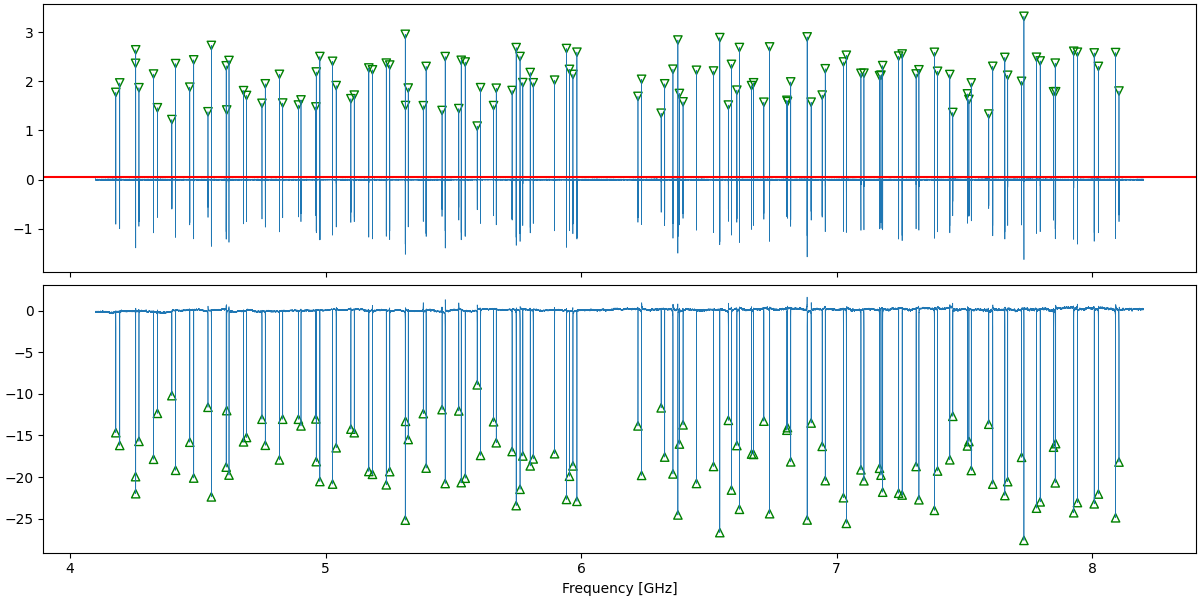

In [5]:
fig, ax = plt.subplot_mosaic('a;b', sharex=True, figsize=(12, 6), constrained_layout=True)
ax['a'].plot(freqs[:-2], d2s21, lw=.5)
ax['b'].plot(freqs, dark_s21, lw=.5)
ax['a'].axhline(mph, c='r')

ax['a'].scatter(freqs[:-2][locs], heights, marker='v', c='None', edgecolor='g')
ax['b'].scatter(f0s, s21_mins, marker='^', c='None', edgecolor='g')
ax['b'].set_xlabel('Frequency [GHz]')
print(len(locs))

In [7]:
files = glob('./S21s/*_*.npy')
nr_steps = len(files)
nr_kids = len(locs)
s21s = np.empty((nr_steps, nr_kids))
s21s[:] = np.nan
s0 = dark_s21[locs]
for i, file in enumerate(files):
    f, s21 = np.load(file)
    s21s[i, :]  = s21[locs] - s0 

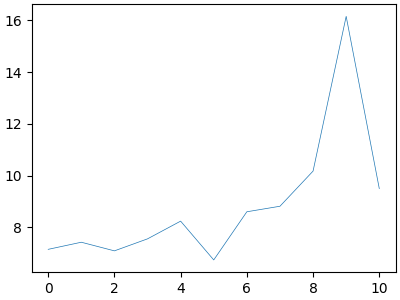

In [8]:
kid = 120
fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
ax.plot(s21s[:, kid], lw=.5)

(array([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 11 artists>)

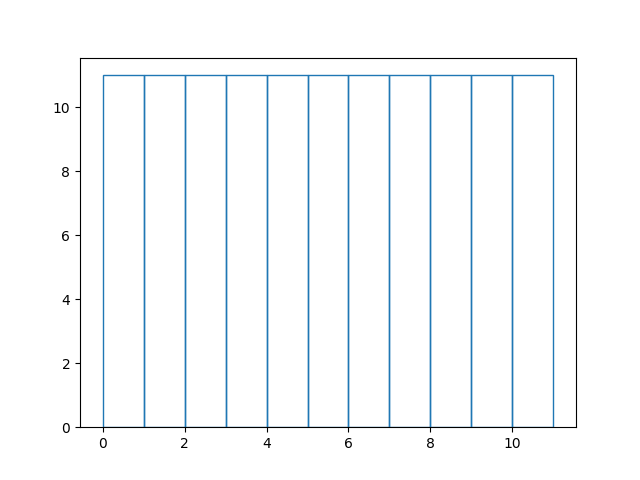

In [9]:
pos = np.empty((nr_kids, 4))
pos[:] = np.nan
pos[:, 0] = np.arange(nr_kids, dtype=int)
pos[:, 1] = locs
pos[:, 2] = f0s
for i in range(nr_kids):
    pos[i, 3] = np.nanargmax(s21s[:, i])
fig, ax = plt.subplots()
ax.hist(pos[:, 3], bins=np.arange(nr_steps+1), facecolor='None', edgecolor='tab:blue')

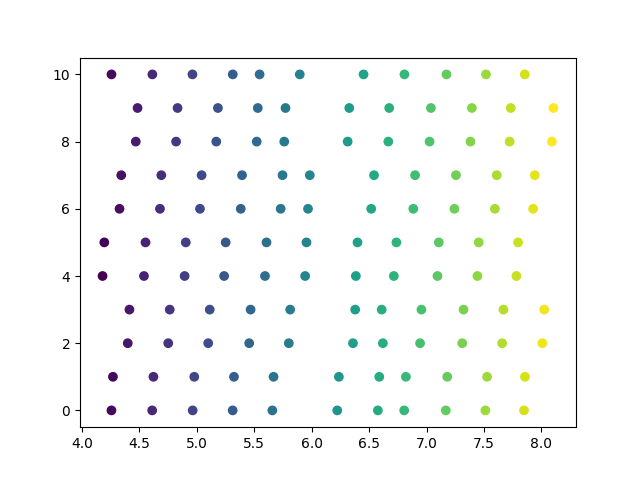

In [10]:
fig, ax = plt.subplots()
ax.scatter(pos[:, 2], pos[:, 3], c=pos[:, 2])

In [11]:
rows = [[] for _ in range(nr_steps)]
for i in pos:
    rows[int(i[-1])].append(int(i[0]))
kids = np.array(rows)  
kids

array([[  2,  13,  25,  35,  47,  60,  71,  79,  90, 101, 112],
       [  4,  15,  26,  37,  48,  61,  72,  81,  92, 103, 114],
       [  7,  18,  29,  40,  53,  64,  74,  84,  95, 106, 117],
       [  8,  19,  30,  41,  54,  65,  73,  85,  96, 107, 118],
       [  0,  11,  22,  33,  45,  56,  66,  77,  88,  99, 110],
       [  1,  12,  23,  34,  46,  57,  67,  78,  89, 100, 111],
       [  5,  16,  27,  38,  49,  58,  69,  82,  93, 104, 115],
       [  6,  17,  28,  39,  50,  59,  70,  83,  94, 105, 116],
       [  9,  20,  31,  42,  51,  62,  75,  86,  97, 108, 119],
       [ 10,  21,  32,  43,  52,  63,  76,  87,  98, 109, 120],
       [  3,  14,  24,  36,  44,  55,  68,  80,  91, 102, 113]])

In [12]:
kid_id_board_full = np.load('KID_ID_BOARD_32x32.npy').astype(int)
kid_id_board_full


array([[   0,   32,   64, ...,  928,  960,  992],
       [ 673,  705,  737, ...,  577,  609,  641],
       [ 322,  354,  386, ...,  226,  258,  290],
       ...,
       [  61,   93,  125, ...,  989, 1021,   29],
       [ 734,  766,  798, ...,  638,  670,  702],
       [ 383,  415,  447, ...,  287,  319,  351]])

In [13]:
kid_id_board_full_derolled = copy(kid_id_board_full)
for i, row in enumerate(kid_id_board_full):
    kid_id_board_full_derolled[i] = np.roll(row, i*21)
kid_id_board_full_derolled

array([[   0,   32,   64, ...,  928,  960,  992],
       [   1,   33,   65, ...,  929,  961,  993],
       [   2,   34,   66, ...,  930,  962,  994],
       ...,
       [  29,   61,   93, ...,  957,  989, 1021],
       [  30,   62,   94, ...,  958,  990, 1022],
       [  31,   63,   95, ...,  959,  991, 1023]])

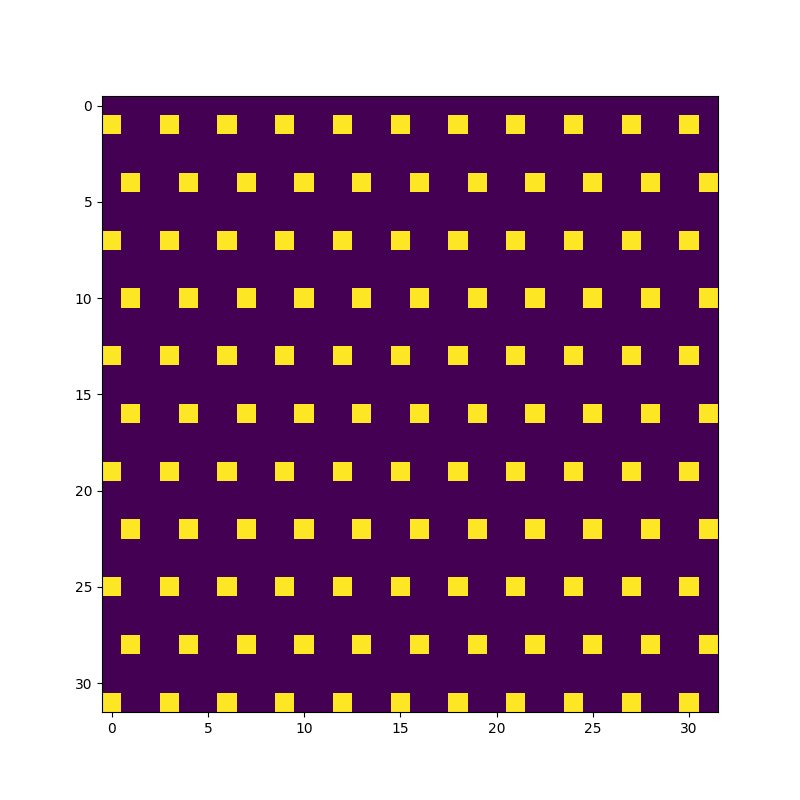

In [14]:
size = 32
mask = np.zeros((size, size), dtype=bool)
count = 0
x = -1
y = -1
for i in range(size):
    if (i+2) % 3 == 0:
        y += 1        
        offset = y % 2
        for j in range(size):
            if (j-offset) % 3 == 0:
                x += 1           
                mask[i, j] = 1
        x = -1

fig, ax = plt.subplots(figsize=(8, 8))  
ax.imshow(mask)

In [15]:
mask_derolled = copy(mask)
for i, row in enumerate(mask):
    mask_derolled[i] = np.roll(row, i*21)
mask_derolled

array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ...,  True, False, False]])

In [16]:
kid_id_board = kid_id_board_full_derolled[mask_derolled].reshape((M_pxs, N_pxs))  
kid_id_board

array([[  33,  129,  225,  321,  417,  513,  609,  673,  769,  865,  961],
       [  36,  132,  228,  324,  420,  516,  612,  676,  772,  868,  964],
       [  71,  167,  263,  359,  455,  551,  615,  711,  807,  903,  999],
       [  74,  170,  266,  362,  458,  554,  618,  714,  810,  906, 1002],
       [  13,  109,  205,  301,  397,  493,  557,  653,  749,  845,  941],
       [  16,  112,  208,  304,  400,  496,  560,  656,  752,  848,  944],
       [  51,  147,  243,  339,  435,  499,  595,  691,  787,  883,  979],
       [  54,  150,  246,  342,  438,  502,  598,  694,  790,  886,  982],
       [  89,  185,  281,  377,  441,  537,  633,  729,  825,  921, 1017],
       [  92,  188,  284,  380,  444,  540,  636,  732,  828,  924, 1020],
       [  31,  127,  223,  319,  383,  479,  575,  671,  767,  863,  959]])

In [17]:
design_f0s = np.load('LT361_4-8GHz_1024px_F0s.npy')*1e-9
design_f0s

array([4.1       , 4.1035225 , 4.10704501, ..., 7.89295499, 7.8964775 ,
       7.9       ])

In [18]:
design = design_f0s[kid_id_board]
meas = f0s[kids]
df_f = (meas - design) / design
print(np.std(df_f))

0.004493363519041653


line
0.0010722716537331686
59.803327703810155
-0.13253060199247324


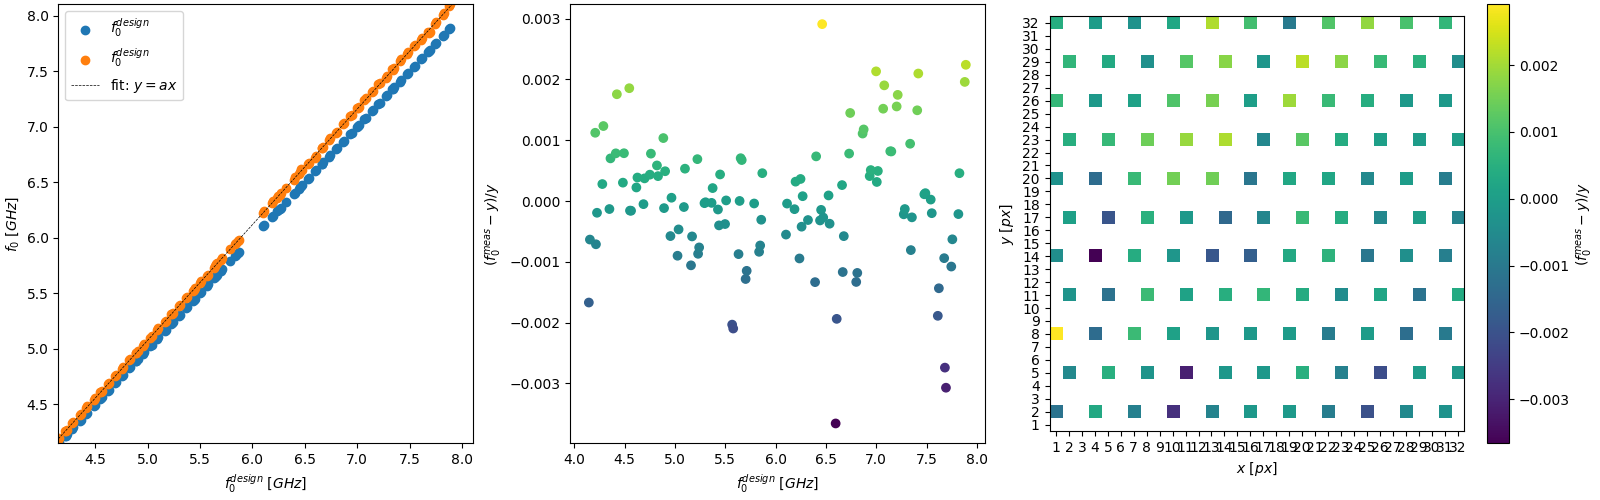

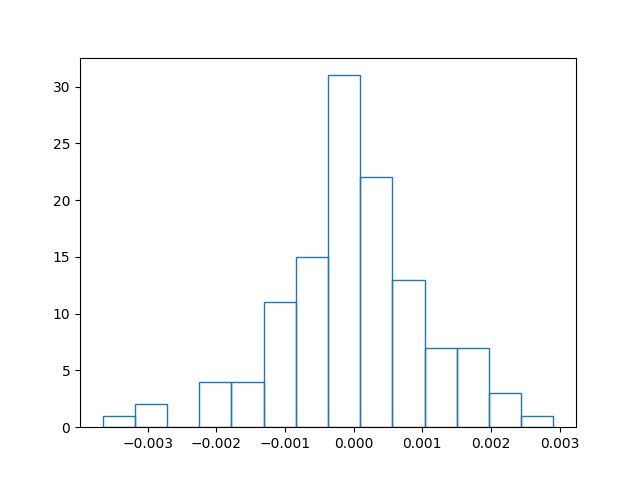

In [36]:
def linear(x, a, b):
    return a*x+b

def secorder(x, a, b, c):
    return a*x**2+b*x

line = linear
popt, pcov = curve_fit(line, design.flatten(), meas.flatten())
corr_design = line(design, *popt)
corr_df_f_derolled = (meas - corr_design) / corr_design
corr_df_f_full = np.empty((32, 32))
corr_df_f_full[:] = np.nan
corr_df_f_full[mask_derolled] = corr_df_f_derolled.flatten()
corr_df_f = copy(corr_df_f_full)
for i, row in enumerate(corr_df_f_full):
    corr_df_f[i] = np.roll(row, i*-21)
nans = np.isnan(corr_df_f)

flim = np.array([np.min((design, meas)), np.max((design, meas))])

if line:
    if line == linear:
        eq = 'y=ax'
        save = 'fit_linear'
    elif line == secorder:
        eq = 'y=ax^2+bx'
        save = 'fit_secorder'
    print('line')
    popt, pcov = curve_fit(line, design.flatten(), meas.flatten())
    fit = line(design, *popt)
    xfit = np.linspace(flim[0], flim[1])
    yfit = line(xfit, *popt)
    label = 'y'
else:
    fit = design
    label = 'f_0^{design}'
    save = 'nofit'

fig, ax = plt.subplot_mosaic('abc', figsize=(16, 5), constrained_layout=True)
ax['a'].scatter(design, design, c='tab:blue', label='$\it f_0^{design}$')
ax['a'].scatter(design, meas, c='tab:orange', label='$\it f_0^{design}$')
if line:
    ax['a'].plot(xfit, yfit, c='k', label='fit: $%s$' % eq, ls='--', lw=0.5)
ax['a'].set_xlabel('$\it f_0^{design}$ $[GHz]$')
ax['a'].set_ylabel('$\it f_0$ $[GHz]$')
ax['a'].set_xlim(flim)
ax['a'].set_ylim(flim)
ax['a'].legend(loc='upper left')
ax['b'].scatter(design, corr_df_f_derolled, c=corr_df_f_derolled, label='residual, $f_0-y_2$')
ax['b'].set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
ax['b'].set_xlabel('$\it f_0^{design}$ $[GHz]$')
im = ax['c'].imshow(corr_df_f, cmap='viridis', origin='lower')
# Major ticks
ax['c'].set_xticks(np.arange(0, size, 1));
ax['c'].set_yticks(np.arange(0, size, 1));
# Labels for major ticks
ax['c'].set_xticklabels(np.arange(1, size+1, 1));
ax['c'].set_yticklabels(np.arange(1, size+1, 1));
# labels
ax['c'].set_xlabel('$\it x$ $[px]$')
ax['c'].set_ylabel('$\it y$ $[px]$')
cbar = fig.colorbar(im, ax=ax['c'])
# cbar.ax.invert_yaxis()
_ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
print(np.std(corr_df_f[~nans]))
# _ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
a = popt[0]
print(1/a**2 * 64.9)
b = popt[1]
print(b)
fig, ax = plt.subplots()
_ = ax.hist(corr_df_f[~nans], bins='auto', facecolor='None', edgecolor='tab:blue')

line
0.0010722716537331686
59.803327703810155
56.933470593584


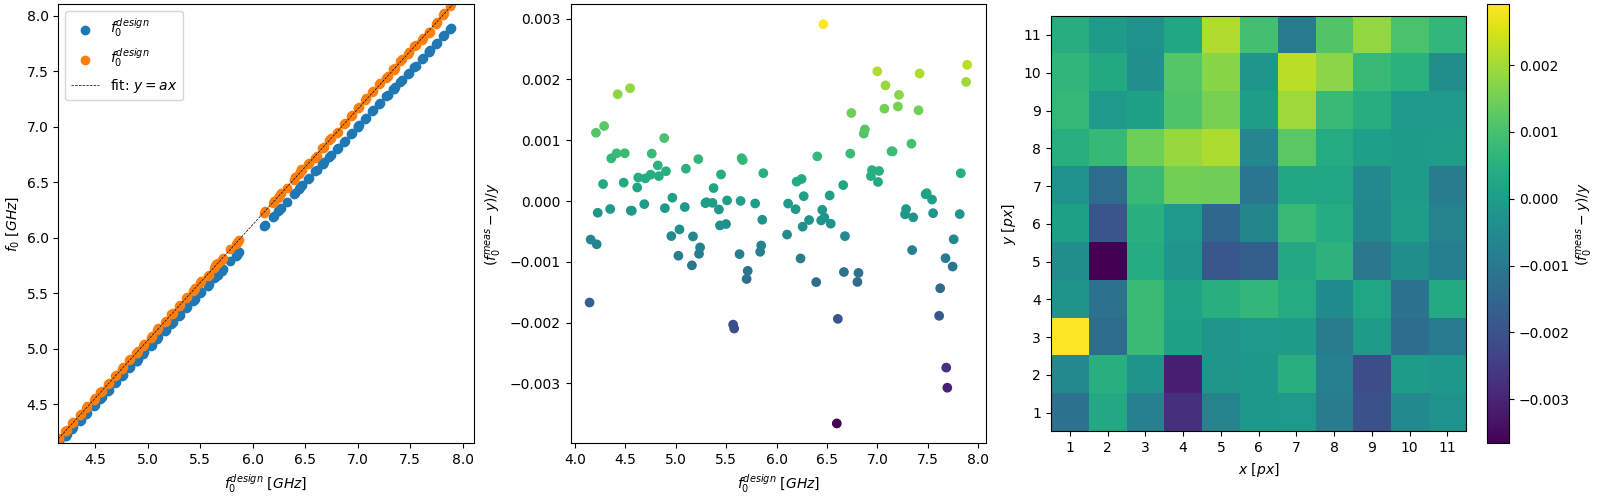

In [37]:
def linear(x, a, b):
    return a*x + b

def secorder(x, a, b, c):
    return a*x**2+b*x

line = linear
popt, pcov = curve_fit(line, design.flatten(), meas.flatten())
corr_design = line(design, *popt)
corr_df_f_derolled = (meas - corr_design) / corr_design
corr_df_f_full = np.empty((32, 32))
corr_df_f_full[:] = np.nan
corr_df_f_full[mask_derolled] = corr_df_f_derolled.flatten()
corr_df_f = copy(corr_df_f_full)
for i, row in enumerate(corr_df_f_full):
    corr_df_f[i] = np.roll(row, i*-21)
nans = np.isnan(corr_df_f)
corr_df_f = corr_df_f[~nans].reshape((11, 11))

flim = np.array([np.min((design, meas)), np.max((design, meas))])

if line:
    if line == linear:
        eq = 'y=ax'
        save = 'fit_linear'
    elif line == secorder:
        eq = 'y=ax^2+bx'
        save = 'fit_secorder'
    print('line')
    popt, pcov = curve_fit(line, design.flatten(), meas.flatten())
    fit = line(design, *popt)
    xfit = np.linspace(flim[0], flim[1])
    yfit = line(xfit, *popt)
    label = 'y'
else:
    fit = design
    label = 'f_0^{design}'
    save = 'nofit'

fig, ax = plt.subplot_mosaic('abc', figsize=(16, 5), constrained_layout=True)
ax['a'].scatter(design, design, c='tab:blue', label='$\it f_0^{design}$')
ax['a'].scatter(design, meas, c='tab:orange', label='$\it f_0^{design}$')
if line:
    ax['a'].plot(xfit, yfit, c='k', label='fit: $%s$' % eq, ls='--', lw=0.5)
ax['a'].set_xlabel('$\it f_0^{design}$ $[GHz]$')
ax['a'].set_ylabel('$\it f_0$ $[GHz]$')
ax['a'].set_xlim(flim)
ax['a'].set_ylim(flim)
ax['a'].legend(loc='upper left')
ax['b'].scatter(design, corr_df_f_derolled, c=corr_df_f_derolled, label='residual, $f_0-y_2$')
ax['b'].set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
ax['b'].set_xlabel('$\it f_0^{design}$ $[GHz]$')
im = ax['c'].imshow(corr_df_f, cmap='viridis', origin='lower')
# Major ticks
ax['c'].set_xticks(np.arange(0, M_pxs, 1));
ax['c'].set_yticks(np.arange(0, N_pxs, 1));
# Labels for major ticks
ax['c'].set_xticklabels(np.arange(1, M_pxs+1, 1));
ax['c'].set_yticklabels(np.arange(1, M_pxs+1, 1));
# labels
ax['c'].set_xlabel('$\it x$ $[px]$')
ax['c'].set_ylabel('$\it y$ $[px]$')
cbar = fig.colorbar(im, ax=ax['c'])
# cbar.ax.invert_yaxis()
_ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
print(np.std(corr_df_f))
# _ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
a = popt[0]
print(1/a**2 * 64.9)
b = popt[1]
print(1/b**2)

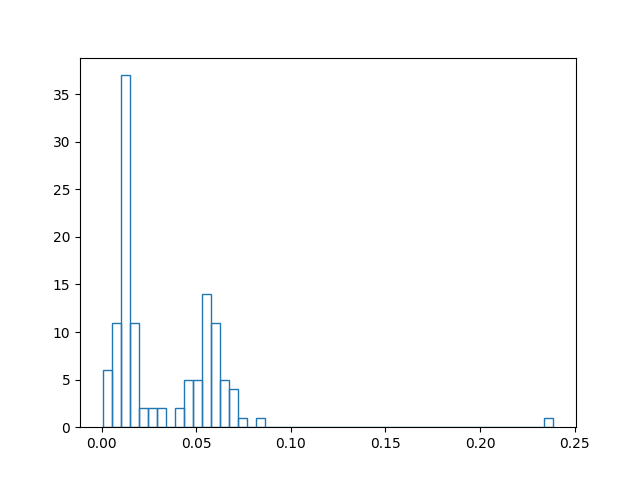

In [31]:
def S21_guess(S21_data, ak, beta):
    Qi_sat = 1e16
    f_read = S21_data[0]

    #making sure units are correct:
    if any(f_read) < 1e6:
        f_read = f_read*1e9

    S21_measured = S21_data[1]
    S21_measured_trans = 10**(S21_measured/10)
    S21_min = np.min(S21_measured_trans)

    f0 = f_read[np.argmin(S21_measured)]

    hw0 = 6.582e-4*2*np.pi*f0*1e-6 #Energy inherent in KID at fres
    kbT0 = 86.17 * .1 #µeV, operating temperature of 100 mK
    s10, s20 = kc.cinduct(hw0, supercond.D0, kbT0)
    Qi_Nqp0 = 2/(ak*beta) * s20/s10

    Qi = Qi_Nqp0 * Qi_sat / (Qi_Nqp0 + Qi_sat) 
    Q = S21_min*Qi
    Qc = Qi*Q/(Qi-Q)
    
    def S21_fit_func(f_read, Qi_fit, Qc_fit, xa_fit):
        S21_fit = np.abs(kc.S21_xa(Qi_fit, Qc_fit, f_read, f0, xa_fit))
        return S21_fit

    popt,pcov = sc.optimize.curve_fit(S21_fit_func, f_read, S21_measured_trans, p0=[Qi/10,Qc/10, 0], bounds=([Qi/200, Qc/200,-1e-5], [Qi*100, Qc*10,1e-5]))
    
    xa_man = 9e-6 

    S21_manual = kc.S21_xa(Qi/50, Qc/50, f_read, f0, xa_man)
    print(f"Manual guess: Qi_man = {Qi/10}, Qc_man = {Qc/10}, xa_man = {xa_man}")
    S21_fit = kc.S21(popt[0], popt[1], f_read, f0)
    print(f"Fitted values: Qi_fit = {popt[0]}, Qc_fit = {popt[1]}, xa_fit = {popt[2]}")
    print(pcov)
    # return lib.dB_scale(S21_0) + np.max(S21_measured)
    return S21_manual, S21_fit, popt